# 1 -Introduction

Nama: Ikhbar Firman Hanafi

Batch: 14

Phase: 1

URL: https://ml2-mathscore-ikhbarfirman.herokuapp.com/

## Data set
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Datasets are provided regarding the performance in Mathematics (mat).

Sumber data: https://archive.ics.uci.edu/ml/datasets/Student+Performance

Attribute Information:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

- these grades are related with the course subject Math
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

## Objective
Membuat prediksi first period grade, second period grade, dan final grade.

# 2 - Import Libraries

Import libraries yang diperlukan

In [621]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA
import joblib

# 3 - Data Loading

Dataset akan kita load menjadi sebuah DataFrame.

In [622]:
data = pd.read_csv('student-mat.csv',delimiter=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [623]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Terdapat sejumlah 395 data points, dimana terdapat categorical object seperti school, sex, adress, famsize dan terdapat numerical value seperti traveltime, studytime,failures. Di antara category obejct tersebut ada yang merupakan binary nominal seperti schoolsup, famsup, sex. Dari semua features saat ini belum ada terdeteksi missing values.

Selanjutnya kita akan membuat nama column dalam huruf kecil untuk memudahkan proses analisis ke depannya.

In [624]:
# Set lowercase to columns
data.rename(columns= str.lower, inplace=True)

In [625]:
bin_cols = []
for col in data.columns:
    if data[col].nunique() == 2:
        bin_cols.append(col)
        print(col, data[col].unique())

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
pstatus ['A' 'T']
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']


Dari semua binary categorical features tersebut tidak terlihat ada value yang tidak sesuai dengan deksripsi features.

Selanjutnya kita akan coba features dengan jumlah lebih dari 2 unique value

In [626]:
for col in data.columns[:-3]:
    if data[col].nunique() > 2:
        print(col, data[col].unique())

age [18 17 15 16 19 22 20 21]
medu [4 1 3 2 0]
fedu [4 1 2 3 0]
mjob ['at_home' 'health' 'other' 'services' 'teacher']
fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
traveltime [2 1 3 4]
studytime [2 3 1 4]
failures [0 3 2 1]
famrel [4 5 3 1 2]
freetime [3 2 4 1 5]
goout [4 3 2 1 5]
dalc [1 2 5 3 4]
walc [1 3 2 4 5]
health [3 5 1 2 4]
absences [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]


Terdapat ordinal data seperti medu,fedu, dan traveltime. Kita akan group ke dalam ordinal features. Kita juga akan membuat categorical features nominal dan numerical features ke dalam cat_cols dan num_cols.

In [627]:
# Classify feature from types
ord_cols = ['medu','fedu','traveltime','studytime','failures','famrel','freetime','goout','dalc','walc','health']
num_cols = ['age','absences']
cat_cols = ['mjob','fjob','reason','guardian']

In [628]:
data.describe()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Dari semua features nampak tidak terdapat keanehan. Seperti pada g1,g2,g3 dimana value berada pada interval 0-20, dan terlihat nilai minimum 0 pada g2 dan g3, value 3 pada nilai minimum g1 dan tidak ada value di atas 20 pada maximum value g1,g2, dan g3. Tidak ada value diluar interval 1-4 pada features medu dan fedu dimana kedua feature tersebut menyatakan tingkat education orang tua siswa. Tidak ada value di luar interval 0-3 pada feature failurs. Namun pada feature age, terlihat max value 22. Sementara rentang usia secondary education di portugal adalah 15-18.

source: https://www.sableinternational.com/blog/schooling-in-portugal

Cek data untuk usia di atas atau sama dengan 20, apakah terdapat suatu keanehan?

In [629]:
data[data['age'] >= 20]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
247,GP,M,22,U,GT3,T,3,1,services,services,...,5,4,5,5,5,1,16,6,8,8
306,GP,M,20,U,GT3,A,3,2,services,other,...,5,5,3,1,1,5,0,17,18,18
376,MS,F,20,U,GT3,T,4,2,health,other,...,5,4,3,1,1,3,4,15,14,15
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7


Terdapat 5 siswa, 2 siswa dari sekolah GP dan 3 siswa dari sekolah MS. Kelima siswa tersebut mempunyai value yang lengkap pada semua features dan mempunyai score baik g1,g2, dan g3. Tidak terlihat ada keanehan data pada kelima siswa tersebut, mungkin memang dikarenakan berbagai kondisi kelima siswa ini masih berada di secondary education pada umur 20.

# 4 - Exploratory Data Analysis

Pertama kita akan tinjau banyaknya siswa male dan female pada masing-masing sekolah di dataset yang kita miliki.

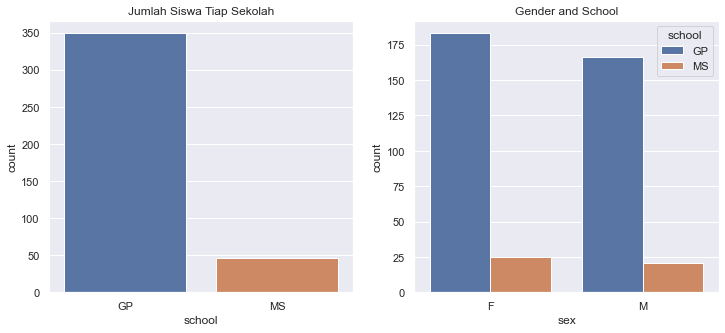

In [630]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='school',data=data)
plt.title('Jumlah Siswa Tiap Sekolah')

plt.subplot(1,2,2)
sns.countplot(x ='sex',data=data,hue='school')
plt.title('Gender and School')
plt.show()

Berdasarkan deskripsi: "GP" - Gabriel Pereira dan "MS" - Mousinho da Silveira

Dari gambar di atas, pada dataset ini terlihat jumlah siswa pada Gabriel Pereira jauh lebih banyak daripada jumlah siswa Mousinho da Silveira. Dari kedua sekolah tersebut proporsi female sedikit lebih banyak daripada male.

<AxesSubplot:xlabel='age', ylabel='Density'>

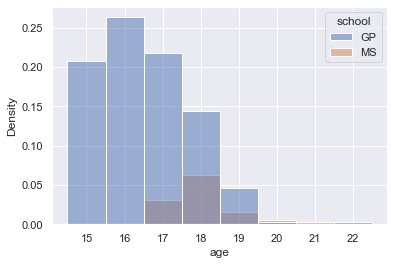

In [631]:
sns.histplot(x='age',hue='school',data=data, discrete=True,stat = 'density')

Seperti yang telah kita ketahui sebelumnya, terdapat sejumlah 5 siswa yang usianya di atas (atau sama dengan) 20 baik dari sekolah Gabriel Pereira maupun Mousinho da Silveira. Dari grafik di atas tidak terlihat siswa yang berusia dibawah 17 tahun dari sekolah Mousinho da Silveira. Proporsi umur terbanyak pada sekolah Gabriel Pereira adalah umur 15-17, sedangkan proporsi umur terbanyak pada sekolah Mousinho da Silveira adalah umur 17 dan 18.

Selanjutnya kita akan coba cek feature famsize dan pstatus.

Text(0.5, 1.0, "Parent's cohabitation status")

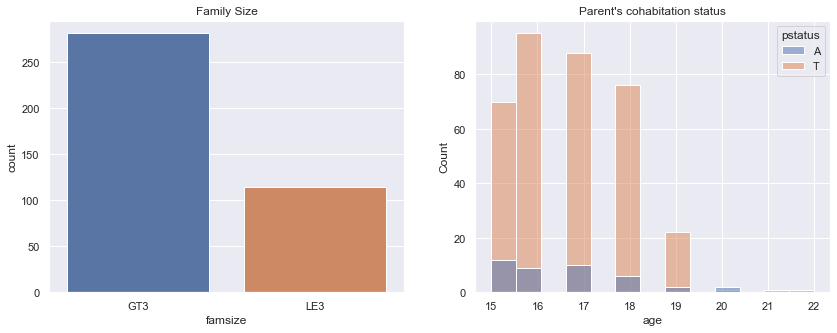

In [632]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(x = 'famsize',data=data)
plt.title('Family Size')
plt.subplot(1,2,2)
sns.histplot(x = 'age',hue='pstatus',data=data)
plt.title("Parent's cohabitation status")

Berdasarkan deskripsi kolom: "LE3" - less or equal to 3 dan "GT3" - greater than 3.
Dari dataset ini jumlah siswa dengan banyaknya anggota keluarga lebih dari 3 orang (GT3) jauh lebih banyak daripada siswa dengan banyaknya anggota keluarga kurang dari (atau sama dengan) 3.

Pada features pstatus: "T" - living together dan "A" - apart.
Mayoritas siswa dalam dataset ini sebagian besar siswa memiliki cohabitation status 'living together', yang mana kedua orang tua mereka tinggal bersama. Terdapat beberapa siswa dimana kedua orang tua mereka sudah tidak tinggal bersama atau berstatus 'apart'.

Kita coba cek alasan siswa dalam memilih sekolah.

Text(0.5, 1.0, 'Mousinho da Silveira')

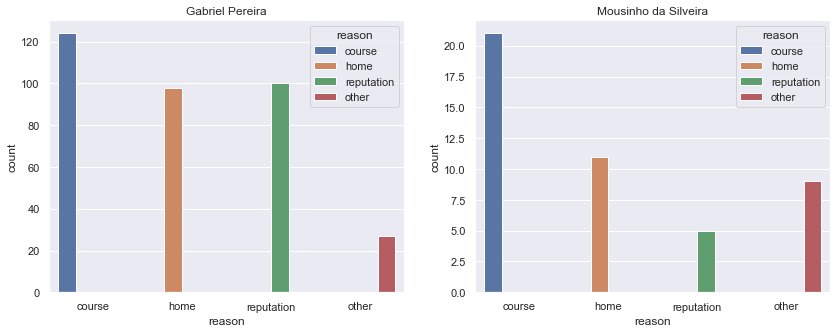

In [633]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(x='reason',hue ='reason',order = ['course','home','reputation','other'],hue_order=['course','home','reputation','other'],
                data=data[data['school'] == 'GP'])
plt.title("Gabriel Pereira")
plt.subplot(1,2,2)
sns.countplot(x='reason',hue ='reason',order = ['course','home','reputation','other'],hue_order=['course','home','reputation','other'],
                data=data[data['school'] == 'MS'])
plt.title("Mousinho da Silveira")

Mayoritas siswa dalam pemilihan sekolah berdasarkan course preferences. Berdasarkan reputation, cukup banyak siswa sekolah Gabriel Pereira memilih sekolah tersebut dengan alasan reputasi, berbeda pada sekolah Mousinho da Silveira. Dari sini nampaknya sekolah GP lebih mempunyai reputasi daripada sekolah MS.

Kita akan coba meninjau score g1, g2, dan g3 pada masing-masing sekolah.

Text(0.5, 1.0, 'Red: GP, Blue: MS')

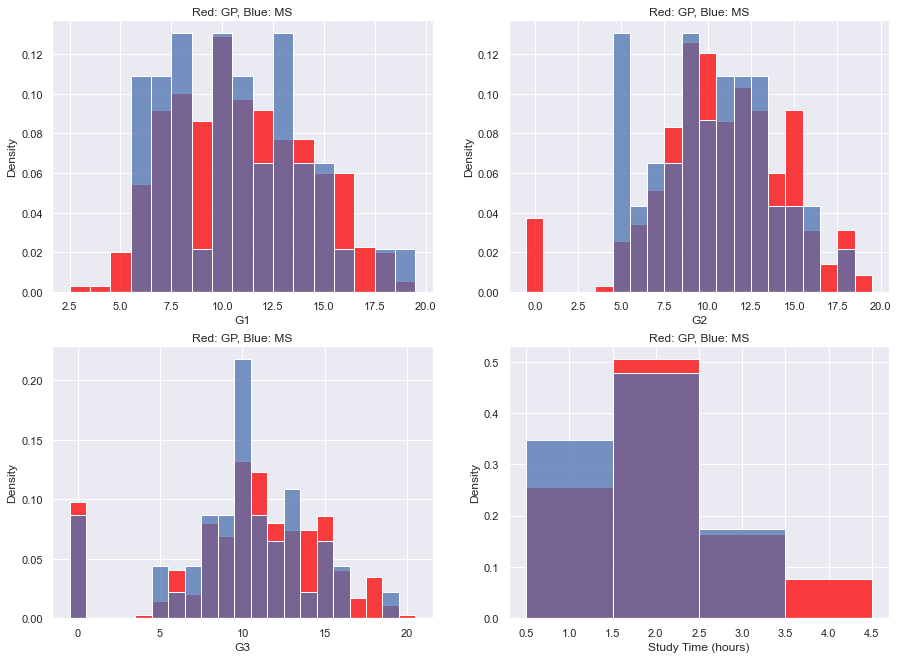

In [634]:
plt.figure(figsize=(15,11))
plt.subplot(2,2,1)
sns.histplot(x = 'g1',data=data[data['school'] == 'GP'],discrete=True,stat='density', color = 'red')
sns.histplot(x = 'g1',data=data[data['school'] == 'MS'], discrete=True,stat='density')
plt.xlabel('G1')
plt.title('Red: GP, Blue: MS')

plt.subplot(2,2,2)
sns.histplot(x = 'g2',data=data[data['school'] == 'GP'],discrete=True,stat='density', color = 'red')
sns.histplot(x = 'g2',data=data[data['school'] == 'MS'], discrete=True,stat='density')
plt.xlabel('G2')
plt.title('Red: GP, Blue: MS')

plt.subplot(2,2,3)
sns.histplot(x = 'g3',data=data[data['school'] == 'GP'],discrete=True,stat='density', color = 'red')
sns.histplot(x = 'g3',data=data[data['school'] == 'MS'], discrete=True,stat='density')
plt.xlabel('G3')
plt.title('Red: GP, Blue: MS')

plt.subplot(2,2,4)
sns.histplot(x = 'studytime',data=data[data['school'] == 'GP'],discrete=True,stat='density', color = 'red')
sns.histplot(x = 'studytime',data=data[data['school'] == 'MS'], discrete=True,stat='density')
plt.xlabel('Study Time (hours)')
plt.title('Red: GP, Blue: MS')

Dari grafik di atas nampak bahwa proporsi siswa yang memiliki score G1, G2, dan G3 yang besar (diatas 15) adalah siswa sekolah GP. Pada score G1, G2, dan G3 yang rendah nampak lebih didominasi oleh siswa MS. Dari sini terlihat adanya hubungan antara reputasi sekolah dengan hasil score siswa, dimana reputasi GP lebih baik dari sekolah MS dan terlihat dari score G1, G2, dan G3. Namun terkait score G1, G2, dan G3 perlu diketahui apakah tingkat kesulitan soal yang diberikan berbeda atau sama.

Selain itu terlihat waktu belajar siswa GP lebih banyak daripada waktu belajar siswa MS.

Salah satu faktor yang tampak mempengaruhi score ujian adalah waktu belajar, kita coba amati scatterplot studytime dengan score G1,G2, dan G3.

<AxesSubplot:xlabel='studytime', ylabel='g3'>

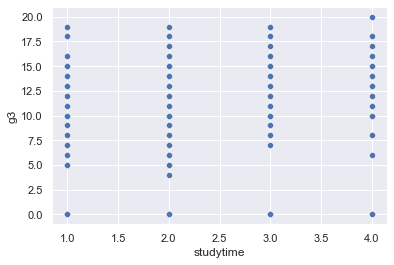

In [635]:
sns.scatterplot(x='studytime',y='g3',data=data)

Dari sini dapat dilihat bahwa, semakin banyak waktu belajar maka semakin sedikit siwa yang mendapatkan final grade G3 yang rendah, meskipun ada juga siswa yang memiliki waktu belajar sedikit namun mendapatkan score G3 yang tinggi. Selain itu terdapat siswa yang waktu belajarnya 4 jam tapi mendapatkan nilai G3 0. Hal tersebut dirasa cukup aneh.

In [636]:
data[(data['studytime'] == 4) & (data['g3'] == 0)]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,2,2,2,1,1,3,0,7,9,0
259,GP,F,17,U,LE3,T,2,2,services,services,...,3,4,1,1,1,2,0,10,9,0
334,GP,F,18,R,GT3,T,2,2,at_home,other,...,4,4,4,1,1,4,0,10,9,0


Terlihat ketiga siswa yang waktu belajarnya 4 jam dan mendapatkan final grade G3 0 memiliki score G1 dan G2. Ktiga siswa tersebut berasal dari sekolah GP. Diduga ketiga siswa tersebut mungkin tidak mengikuti ujian G3 atau terdapat faktor lain yang tidak diketahui dari data. 

Berikutnya kita akan coba melihat skor korelasi antar features.

<AxesSubplot:>

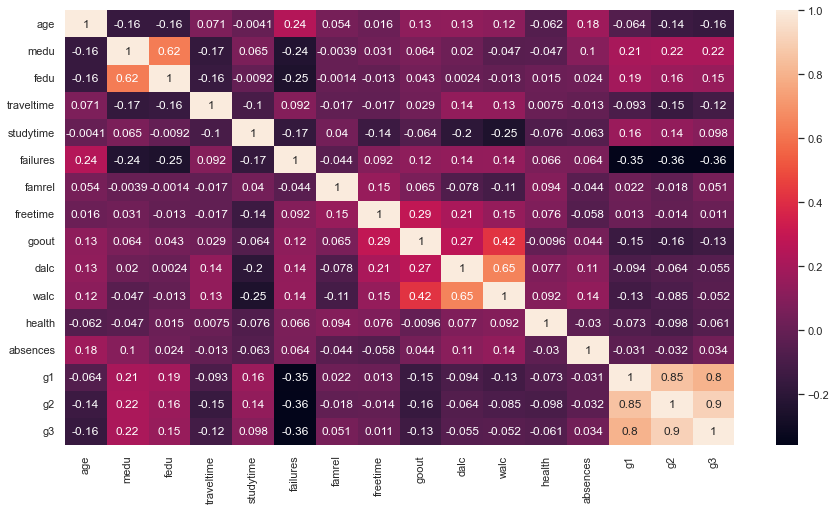

In [637]:
cor = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(cor, annot=True)

tampak jelas G1, G2, dan G3 saling berkorelasi satu sama lain. Hal tersebut bisa dikarenakan penilaian akhir G3 berdasarkan skor G1 dan G2. Selain itu siswa yang katakanlah pintar sehingga mendapatkan score G1 yang baik cenderung juga akan mendapatkan score G2 dan G3 yang baik, dan juga sebaliknya. 

Selain itu G1, G2, dan G3 terlihat memiliki korelasi negative yang cukup kuat pada features 'failures', dimana value failures ini menandakan jumlah ujian yang gagal sebelumnya. Features failures ini terlihat memiliki korelasi negative yang cukup kuat dari age, fedu, dan medu. Dimana fedu dan medu menandakan tingkat edukasi orang tua siswa. Bisa jadi tingkat edukasi orang tua yang tinggi lebih dapat mendidik anaknya untuk tidak gagal dalam ujian.

Feature studytime yang diperkirakan faktor keberhasilan G1, G2, dan G3 justru memiliki korelasi yang rendah dibandingkan feaures lainnya.

Selain itu features dalc dan walc terlihat memiliki korelasi yang kuat. Berdasarkan deskripsi kolom: dalc menyatakan workday alcohol consumption dan walc menyatakan weekend alcohol consumption. Hal tersebut dirasa masuk akal, siswa yang mengkonsumsi alkohol saat workday cenderung mengkonsumsi alkohol pada weekend, atau sebaliknya.

# 5 - Data Preprocessing

## Get Data for Model Inference

In [638]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state=17)
data_inf

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
226,GP,F,17,U,GT3,T,3,2,other,other,...,5,3,4,1,3,3,10,16,15,15
35,GP,F,15,U,GT3,T,2,3,other,other,...,3,5,1,1,1,5,0,8,7,6
219,GP,F,17,U,GT3,T,2,2,at_home,at_home,...,4,3,3,1,1,4,4,9,10,10
80,GP,M,15,U,GT3,T,2,3,other,services,...,3,2,2,1,3,3,2,10,12,12
64,GP,F,15,U,LE3,T,4,3,services,services,...,4,4,4,2,4,2,0,10,10,10
20,GP,M,15,U,GT3,T,4,3,teacher,other,...,4,4,1,1,1,1,0,13,14,15
199,GP,F,16,U,LE3,T,4,4,teacher,teacher,...,4,5,2,1,2,3,0,9,9,10
211,GP,M,17,U,LE3,T,4,4,services,other,...,5,3,5,4,5,3,13,12,12,13
309,GP,F,19,U,LE3,T,1,1,at_home,other,...,4,4,3,1,3,3,18,12,10,10
299,GP,M,18,U,LE3,T,4,4,teacher,teacher,...,1,4,2,2,2,1,5,16,15,16


Berikutnya kita akan remove titik point data inference dari dataset.

In [639]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Kita akan reset index untuk data_train_test, dan data_inf.

In [640]:
# Reset Index 

data_train_test.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)

## Splitting between **X** (Features) and **y** (Target)

In [641]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop(['g1','g2','g3'], axis=1) 
y = data_train_test[['g1','g2','g3']]

## Split between Train-Set and Test-Set

Kita akan split data menjadi data train dan data test, dengan porsi 20% untuk data test dan 80% untuk data train.

In [642]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (308, 30)
Test Size  :  (77, 30)


Karena pada data sebelumnya tidak ditemukan missing values, maka selanjutnya kita akan coba cek outliers pada data train.

## Handling Outliers

Kita coba cek distribusi tiap features untuk mengetahui adanya outliers pada tiap feature.

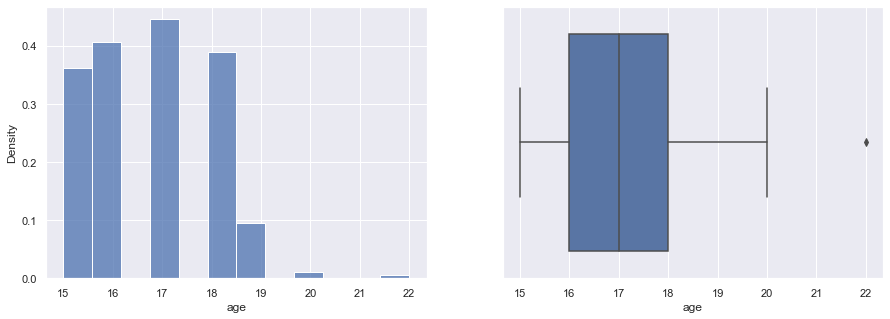

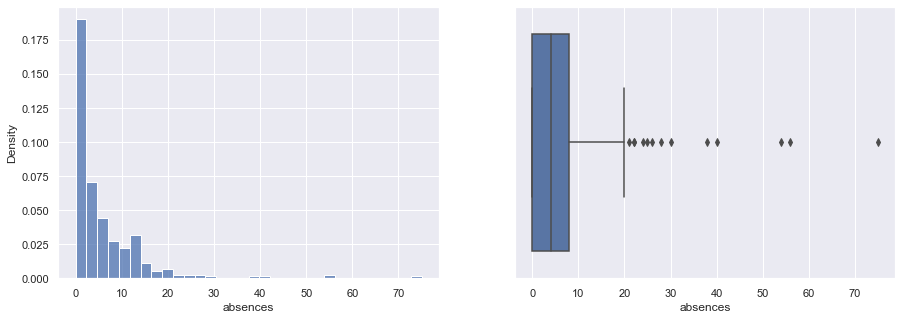

In [643]:
for col in num_cols:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(x = col, data = X_train, stat='density')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=X_train)
    plt.show()

Kita juga bisa melihat batas atas dan bawah outliers dengan function berikut.

In [644]:
def find_outliers(data,variable, distance):
    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)
    upper_bound = data[variable].quantile(0.75) + distance*IQR
    lower_bound = data[variable].quantile(0.25) - distance*IQR
    upper_rate = round(np.sum(data[variable] >= upper_bound)/len(data),2)
    lower_rate = round(np.sum(data[variable] <= lower_bound)/len(data),2)
    return upper_bound, upper_rate, lower_bound, lower_rate

In [645]:
total_outliers = [False for i in range(len(X_train))]
for feature in num_cols:
    outlier = ((X_train[feature] > find_outliers(X_train,feature,1.5)[0]) | (X_train[feature] < find_outliers(X_train,feature,1.5)[2]))
    total_outliers = total_outliers | outlier
print('Banyaknya outliers dari semua features dengan distance IQR 1.5:',np.sum(total_outliers))
print('Banyaknya total data train:', len(X_train))

Banyaknya outliers dari semua features dengan distance IQR 1.5: 14
Banyaknya total data train: 308


Terdapat 14 data yang tergolong outliers pada data train dengan distance 1.5 IQR. Karena hanya terdapat sedikit outliers, maka akan kita remove.

In [646]:
# Data tanpa outliers
X_train_nooutliers = X_train[~total_outliers]
y_train_nooutliers = y_train[~total_outliers]
print(len(X_train_nooutliers))

294


## Feature Scaling, Encoding and Dimensionality Reduction

Sebelum dilakukan analisis model prediksi, kita lakukan scaling pada numerical value, encoding dan dimensionality reduction. Pada value categorical kita akan terapkan OneHotEncoder, pada feature ordinal kita akan gunakan OrdinalEncoder, dan scaling value dengan StandardScaler. Setelahnya kita akan reduksi dimensi data menggunakan Principal component analysis (PCA) dengan set n_components 0.9.

In [647]:
preprocess = ColumnTransformer([
    ('onehot',OneHotEncoder(), bin_cols+cat_cols),
    ('ordinal',OrdinalEncoder(),ord_cols)
    ])
final_preprocess = make_pipeline(preprocess,MinMaxScaler(),PCA(n_components=0.9))

In [648]:
X_train_ready = final_preprocess.fit_transform(X_train_nooutliers)
X_test_ready = final_preprocess.transform(X_test)
X_train_ready_df = pd.DataFrame(X_train_ready)
X_test_ready_df = pd.DataFrame(X_test_ready)
print('Train size:',(X_train_ready_df.shape))
print('Test size:',(X_test_ready_df.shape))

Train size: (294, 23)
Test size: (77, 23)


Setelah diterapkan dimensionality reduction dengan PCA dimensi data atau features data train maupun test menjadi 31.

# 6 - Model Definition

Kita akan menerapkan 4 model yang berbeda untuk memprediksi target output g1 dan g2, yaitu:
- Linear Regression
- Lasso dan Ridge Regression
- XGB
- SVR

Selanjutnya kita akan membuat model untuk predict g3 dengan memasukkan g1 dan g2 sebagai variables input dikarenakan g1 dan g2 mempunyai korelasi yang sangat kuat terhadap g3. Model yang digunakan disini adalah Linear Regression. Dan untuk finalisasinya kita akan memakai hasil predict g1 dan g2 (yang terbaik keempat model) untuk membuat predict g3.

Metrics yang digunakan disini adalah mean_absolute_error, dimana mean_absolute_error akan mencari mean dari absolute difference antara aktual dan prediksi output target.

Adapun hyperparameter yang akan ditetapkan adalah:
- Linear Regression: tidak ada
- Lasso dan Ridge: alpha
- XGBRegressor: n_estimators, max_depth, learning_rate, dan min_child_weight
- SVR: C, epsilon dan gamma.

# 7 - Model Training

## Linear Regression

Karena tidak dilakukan hyperparameter tuning pada Linear Regression, maka kita bisa langsung mendefinisikan model dan membuat prediksi.

In [649]:
# Define and fit model
linreg = MultiOutputRegressor(LinearRegression())
linreg.fit(X_train_ready_df,y_train_nooutliers.iloc[:,[0,1]])

MultiOutputRegressor(estimator=LinearRegression())

Kita dapat menghasilkan multiiple preiction output terhadap g1 dan g2 score sebagai berikut.

In [650]:
pred_train_linreg = linreg.predict(X_train_ready_df)
pred_test_linreg = linreg.predict(X_test_ready_df)

## Lasso and Ridge Regression

Langkah pertama yang akan dilakukan adalah mencari value alpha yang tepat pada Lasso dan Ridge dan membandingkan MAE train dan test score yang cocok.

Untuk mempermudah pencarian parameter, kita akan gunakan function berikut.

In [651]:
def modelfit(alg, X, y,X1,y1,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    #Fit the algorithm on the data
    alg.fit(X, y)
        
    #Predict training set:
    train_predictions = alg.predict(X)
    test_predictions = alg.predict(X1)
    train_pred = alg.predict(X)
    test_pred = alg.predict(X1)

    return mean_absolute_error(y, train_pred), mean_absolute_error(y1, test_pred)

Kemudian kita plot MAE score train dan test pada Lasso dan Ridge.

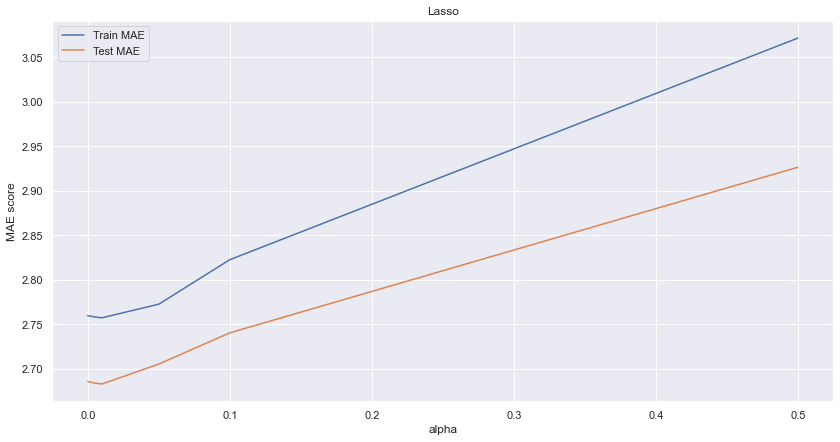

In [652]:
# Plot MAE score train dan test Lasso
alphas = [0.000001,0.000005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5]
MAE_train = []
MAE_test = []
for i in alphas:
    tree=MultiOutputRegressor(Lasso(alpha=i,random_state=27))
    MAE_train_score = modelfit(tree,X_train_ready_df,y_train_nooutliers,X_test_ready,y_test)[0]
    MAE_test_score = modelfit(tree,X_train_ready_df,y_train_nooutliers,X_test_ready,y_test)[1]
    MAE_train.append(MAE_train_score)
    MAE_test.append(MAE_test_score)
   
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=MAE_train,x=alphas,label="Train MAE")
sns.lineplot(y=MAE_test,x=alphas,label="Test MAE")
plt.xlabel('alpha')
plt.ylabel('MAE score')
plt.title('Lasso')
plt.show()

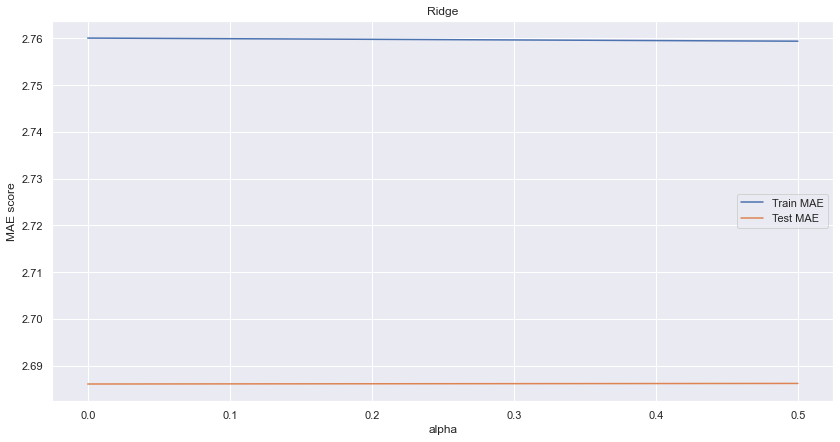

In [653]:
# Plot MAE score train dan test Ridge
MAE_train = []
MAE_test = []
for i in alphas:
    model=MultiOutputRegressor(Ridge(alpha=i,random_state=27))
    MAE_train_score = modelfit(model,X_train_ready_df,y_train_nooutliers,X_test_ready,y_test)[0]
    MAE_test_score = modelfit(model,X_train_ready_df,y_train_nooutliers,X_test_ready,y_test)[1]
    MAE_train.append(MAE_train_score)
    MAE_test.append(MAE_test_score)
   
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=MAE_train,x=alphas,label="Train MAE")
sns.lineplot(y=MAE_test,x=alphas,label="Test MAE")
plt.xlabel('alpha')
plt.ylabel('MAE score')
plt.title('Ridge')
plt.show()

Dari sini kita dapat melihat baik pada Lasso dan Ridge MAE test score lebih kecil dibanding MAE score train. Pada Lasso, semakin meningkat alpha, maka semakin meningkat pula MAE train maupun test, tetapi difference kedua score tersebut tetaplah sama berapapun alpha yang kita set. Sedangkan pada Ridge, MAE score test lebih kecil dibanding MAE train. Kedua score tersebut konstan terhadap perubahan alpha.

**Oleh karena itu kita akan mengevaluasi model Linear Regression saja**

## XGB

Kita akan melakukan pencarian value parameter XGBRegressor yaitu: n_estimators, max_depth, learning_rate, dan min_child_weight. Pencarian value parameter tersebut akan dicari secara manual dengan meninjau MAE pada prediksi dan aktual data train dan data test. Adapun value parameter yang akan kita coba masukkan adalah:

In [654]:
# Value parameter yang akan diujicoba
xgb_param = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [10, 50, 100]}

Untuk mempermudah hyperparameter tuning, score MAE test dan train dapat dikalkulasi dengan function berikut.

In [655]:
# MAE test dan MAE train dari parameter yang ditentukan
def xgb_params(X1,X2,y1,y2,n,md,lr,mcw):
    model = MultiOutputRegressor(XGBRegressor(n_estimators=n,max_depth=md,learning_rate=lr,min_child_weight=mcw))
    model.fit(X1,y1)
    train_pred = model.predict(X1)
    test_pred = model.predict(X2)
    error_train = mean_absolute_error(y1,train_pred)
    error_test = mean_absolute_error(y2,test_pred)
    return error_train,error_test

In [656]:
mae_train_xgb = []
mae_test_xgb = []
mae_params_list = []
for n in xgb_param['n_estimators']:
    for md in xgb_param['max_depth']:
        for lr in xgb_param['learning_rate']:
            for mcw in xgb_param['min_child_weight']:
                mae_train_xgb.append(xgb_params(X_train_ready_df,
                                X_test_ready_df,y_train_nooutliers.iloc[:,[0,1]],y_test.iloc[:,[0,1]],n,md,lr,mcw)[0])
                mae_test_xgb.append(xgb_params(X_train_ready_df,
                                X_test_ready_df,y_train_nooutliers.iloc[:,[0,1]],y_test.iloc[:,[0,1]],n,md,lr,mcw)[1])
                mae_params_list.append((n,md,lr,mcw))



Kita akan coba plot MAE test dan MAE train.

Text(0, 0.5, 'Test MAE')

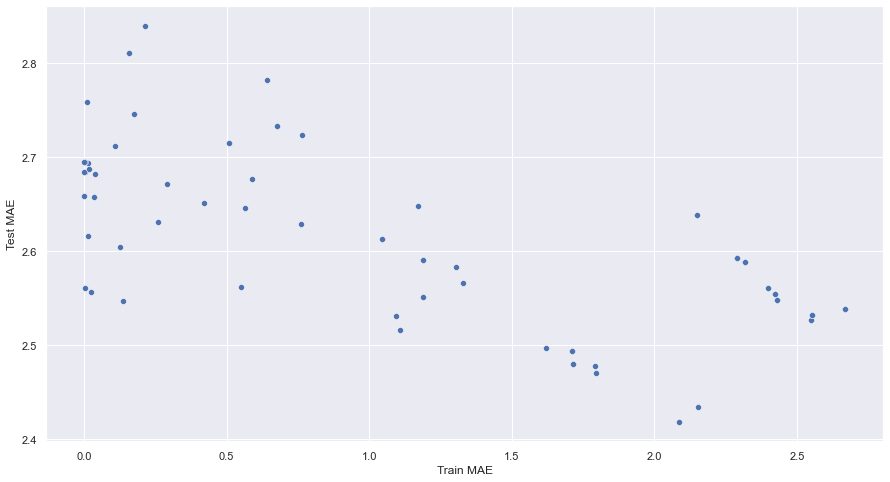

In [657]:
#Plot MAE test dan MAE train
plt.figure(figsize=(15,8))
sns.scatterplot(x = mae_train_xgb,y = mae_test_xgb)
plt.xlabel('Train MAE')
plt.ylabel('Test MAE')

Dari grafik tersebut, kita ingin mencari nilai x, y, dan seliih |x-y| seminimum mungkin. Terlihat point yang sesuai kriteria adalah dengan nilai y (test mae) paling kecil.

In [658]:
ind = np.argmin(mae_test_xgb)
print('MAE test:',mae_test_xgb[ind])
print('MAE train:',mae_train_xgb[ind])
print(mae_params_list[ind])

MAE test: 2.418625531258521
MAE train: 2.084784766443733
(100, 6, 0.05, 50)


Didapat MAE test 2.56 dan MAE train 2.41 dengan value parameter berikut:
- n_estimators: 100
- max_depth: 6
- learning_rate: 0.05
- min_child_weight: 50

Sehingga kita bisa membuat model XGBRegressor sebagai berikut.

In [679]:
xgb = MultiOutputRegressor(XGBRegressor(n_estimators=100,max_depth=6,learning_rate=0.05,min_child_weight=50))
xgb.fit(X_train_ready_df,y_train_nooutliers.iloc[:,[0,1]])

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=50, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...))

Berikutnya akan dibuat hasil prediksi dari model XGBRegressor yang telah ditetapkan.

In [680]:
# Hasil prediksi model XGBRegressor
pred_train_xgb = xgb.predict(X_train_ready_df)
pred_test_xgb = xgb.predict(X_test_ready_df)

## Support Vector Regression (SVR)

In [681]:
# Parameters for tuning
param_svr = [{'kernel': ['rbf','poly'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
svr_grid = GridSearchCV(SVR(epsilon = 0.01), param_svr, cv = 5,scoring='neg_mean_absolute_error')
svr_grid.fit(X_train_ready_df, y_train_nooutliers['g1'])
svr_grid.best_estimator_

SVR(C=10, epsilon=0.01, gamma=0.2)

Dari hasil GridSearchCV didapatkan value:
- C=10
- epsilon = 0.01
- gamma = 0.2

Kita akan coba bandingkan score MAE train dan test dengan parameter tersebut.

In [682]:
pred_train_grid = svr_grid.best_estimator_.predict(X_train_ready_df)
pred_test_grid = svr_grid.best_estimator_.predict(X_test_ready_df)
print('SVR grid train:',mean_absolute_error(y_train_nooutliers['g1'],pred_train_grid))
print('SVR grid test:',mean_absolute_error(y_test['g1'],pred_test_grid))

SVR grid train: 0.18543818287928635
SVR grid test: 2.3873568923763613


Terlihat perbedaan yang cukup besar antara MAE train dan MAE test, dimana MAE train lebih besar daripada MAE test dan dapat dikatakan *over-fitting*.

Kita akan coba memvariasikan  value gamma dan epsilon untuk mendapatkan hasil yang lebih baik.

In [683]:
svr_trial = SVR(C=10, epsilon=0.001, gamma=0.025,kernel='rbf')
svr_trial.fit(X_train_ready_df,y_train_nooutliers['g1'])
pred_train_grid = svr_trial.predict(X_train_ready_df)
pred_test_grid = svr_trial.predict(X_test_ready_df)
print('SVR grid train:',mean_absolute_error(y_train_nooutliers['g1'],pred_train_grid))
print('SVR grid test:',mean_absolute_error(y_test['g1'],pred_test_grid))

SVR grid train: 2.0814215277114285
SVR grid test: 2.1768618392706274


Meskipun MAE train menjadi bertambah, namun berdasarkan perbedaan MAE train dan test score menjadi lebih kecil.

Kita coba parameter tersebut pada prediksi g2 score.

In [684]:
svr_trial_2 = SVR(C=10, epsilon=0.001, gamma=0.025,kernel='rbf')
svr_trial_2.fit(X_train_ready_df,y_train_nooutliers['g2'])
pred_train_grid = svr_trial_2.predict(X_train_ready_df)
pred_test_grid = svr_trial_2.predict(X_test_ready_df)
print('SVR grid train:',mean_absolute_error(y_train_nooutliers['g2'],pred_train_grid))
print('SVR grid test:',mean_absolute_error(y_test['g2'],pred_test_grid))

SVR grid train: 2.2625807879896076
SVR grid test: 2.4900849234309703


Dapat dilihat MAE score test dan train untuk g1 lebih baik (lebih kecil) daripada MAE score test dan train pada g2. Namun perbedaannya tidaklah begitu jauh. Sehingga kita dapat menggunakan parameter yang sama untuk g1 dan g2.

Dengan parameter tersebut kita dapat membuat model untuk prediksi score g1 dan g2.

In [685]:
# Define and fit model
svr = MultiOutputRegressor(SVR(C=10, epsilon=0.001, gamma=0.025,kernel='rbf'))
svr.fit(X_train_ready_df,y_train_nooutliers.iloc[:,[0,1]])

# Hasil prediksi model SVR
pred_train_svr = svr.predict(X_train_ready_df)
pred_test_svr = svr.predict(X_test_ready_df)

## Model Predict G3 using Linear Regression

Selanjutnya kita akan membuat model untuk memprediksi score G3 dengan model Linear Regression. Adapun feature yang digunakan untuk predict G3 hanya 'failures','g1', dan 'g2' dikarenakan ketiga feature tersebut mempunyai nilai korelasi yang kuat terhadap G3.

Model yang dibuat dengan menggunakan data train X_g3 dan y_g3. Sedangkan pada finalisasi deploymentnya model ini akan memprediksi berdasarkan input value failures dan hasil prediksi G1 dan G2.

Sebelumnya kita akan membuat X dan y untuk model predict G3.

In [686]:
y_g1_g2_train = y_train_nooutliers[['g1','g2']].values
y_g1_g2_test = y_test[['g1','g2']].values
X_g3 = pd.DataFrame(np.concatenate([X_train_nooutliers['failures'].values.reshape(-1,1),y_g1_g2_train],axis = 1),
                    columns=['failures','g1','g2'])
X_g3_test = pd.DataFrame(np.concatenate([X_test['failures'].values.reshape(-1,1),y_g1_g2_test],axis = 1),
                    columns=['failures','g1','g2'])                    
y_g3 = y_train_nooutliers['g3']
y_g3_test = y_test['g3']
X_g3_test

,failures,g1,g2
0,0,15,16
1,0,9,10
2,0,15,14
3,1,15,12
4,0,13,14
...,...,...,...
72,1,6,5
73,0,9,7
74,0,9,9
75,0,9,10


Dikarenakan hanya terdapat tiga features dan semuanya numeric, maka untuk preprocessing kita hanya melakukan feature scaling dengan MinMaxScaler.

In [687]:
# Feature scaling untuk G3
scaler_2 = MinMaxScaler()
X_g3_ready = scaler_2.fit_transform(X_g3)
X_g3_test_ready = scaler_2.transform(X_g3_test)

Selanjutnya kita dapat mendefinisikan dan fit model linear regression terhadap X dan y yang sesuai untuk G3.

In [688]:
# Define and fit model
linreg_2 = LinearRegression()
linreg_2.fit(X_g3_ready,y_g3)

LinearRegression()

Hasil prediksinya dapat kita buat sebagai berikut.

In [689]:
pred_g3_train = linreg_2.predict(X_g3_ready)
pred_g3_test = linreg_2.predict(X_g3_test_ready)

# 8 - Model Evaluation

Dari semua hasil prediksi masing-masing model akan kita lihat mean_absolute_error score (MAE) dan untuk mempermudah pengamatan score MAE kita jadikan DataFrame.

In [690]:
# MAE score masing-masing model
linreg_mae = [mean_absolute_error(y_train_nooutliers['g1'], pred_train_linreg[:,0]),
              mean_absolute_error(y_test['g1'], pred_test_linreg[:,0]),
              mean_absolute_error(y_train_nooutliers['g2'], pred_train_linreg[:,1]),
              mean_absolute_error(y_test['g2'], pred_test_linreg[:,1])]
xgb_mae = [mean_absolute_error(y_train_nooutliers['g1'], pred_train_xgb[:,0]),
            mean_absolute_error(y_test['g1'], pred_test_xgb[:,0]),
            mean_absolute_error(y_train_nooutliers['g2'], pred_train_xgb[:,1]),
            mean_absolute_error(y_test['g2'], pred_test_xgb[:,1])]
svr_mae = [mean_absolute_error(y_train_nooutliers['g1'], pred_train_svr[:,0]),
           mean_absolute_error(y_test['g1'], pred_test_svr[:,0]),
           mean_absolute_error(y_train_nooutliers['g2'], pred_train_svr[:,1]),
           mean_absolute_error(y_test['g2'], pred_test_svr[:,1])]               

In [691]:
MAE_score_df = pd.DataFrame([linreg_mae,xgb_mae,svr_mae],columns=['MAE_train_G1','MAE_test_G1','MAE_train_G2','MAE_test_G2'],
                                            index=['Linear Regression','XGB','SVR'])
MAE_score_df['mean']  = MAE_score_df.mean(axis = 1)
MAE_score_df                                            

,MAE_train_G1,MAE_test_G1,MAE_train_G2,MAE_test_G2,mean
Linear Regression,2.459584,2.301895,2.639053,2.540289,2.485205
XGB,1.994255,2.287679,2.175314,2.549572,2.251705
SVR,2.081422,2.176862,2.262581,2.490085,2.252737


MAE score untuk G2 sedikit lebih besar dari MAE score G1 dari semua model. Tidak terdapat suatu perbedaan yang jauh pada MAE score tiap model. Dari mean keseluruhan MAE score, model XGB dan SVR memiliki mean lebih kecil dibanding Linear Regression. Apbila dilihat dari MAE test G1 dan G2 model SVR nampak sedikit lebih baik dibanding model XGB. 

**Oleh karena itu diputuskan model yang dipilih untuk predict G1 dan G2 adalah SVR.**

Selanjutnya kita cek mean_absolute_error pada prediksi G3.

In [692]:
print(mean_absolute_error(y_g3,pred_g3_train))
print(mean_absolute_error(y_g3_test,pred_g3_test))

1.0951641750881969
1.3751480092210904


Terlihat baik untuk predict train dan test score G3 tidaklah berbeda jauh, dan bahkan lebih baik dibanding MAE score G1 dan G2.

# 9 - Model Saving

Dari preprocessing hingga penerapan model prediksi, kesemua proses itu akan kita jadikan dalam satu pipeline.

In [693]:
final_pipeline = make_pipeline(final_preprocess, 
                MultiOutputRegressor(SVR(C=10, epsilon=0.001, gamma=0.025,kernel='rbf')))
final_pipeline_2 = make_pipeline(scaler_2, LinearRegression()) #Model untuk G3

Sebelum kita save model yang sudah kita buat, pipeline tersebut kita lakukan fit terlebih dahulu.

In [694]:
# training
final_pipeline.fit(X_train_nooutliers, y_train_nooutliers[['g1','g2']])
final_pipeline_2.fit(X_g3,y_g3)

# eval 
y_pred_test = final_pipeline.predict(X_test)
y_pred_test_2 = final_pipeline_2.predict(X_g3_test)

print(mean_absolute_error(y_test.iloc[:,[0,1]], y_pred_test)) # MAE G1 dan G2
print(mean_absolute_error(y_g3_test,y_pred_test_2)) # MAE G3

2.3334733813507986
1.3751480092210904


Kemudian keseluruhan proses dalam pipeline yang kita buat akan disimpan dalam bentuk '.pkl' sebagai berikut.

In [696]:
#with open('final_pipeline.pkl', 'wb') as file_1:
  #joblib.dump(final_pipeline, file_1)

#with open('final_pipeline_2.pkl','wb') as file_2:
  #joblib.dump(final_pipeline_2,file_2)

# 10 - Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set, yakni data inference. 

In [697]:
X_inf = data_inf.drop(['g1','g2','g3'],axis=1)
X_inf_g3 =  data_inf.drop('g3',axis=1)
X_inf_g3 = X_inf_g3[['failures','g1','g2']]
y_inf = data_inf[['g1','g2','g3']]
y_inf_g3 = data_inf['g3']
X_inf

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences
0,GP,F,17,U,GT3,T,3,2,other,other,...,yes,yes,no,5,3,4,1,3,3,10
1,GP,F,15,U,GT3,T,2,3,other,other,...,yes,no,no,3,5,1,1,1,5,0
2,GP,F,17,U,GT3,T,2,2,at_home,at_home,...,yes,yes,no,4,3,3,1,1,4,4
3,GP,M,15,U,GT3,T,2,3,other,services,...,yes,yes,yes,3,2,2,1,3,3,2
4,GP,F,15,U,LE3,T,4,3,services,services,...,yes,yes,yes,4,4,4,2,4,2,0
5,GP,M,15,U,GT3,T,4,3,teacher,other,...,yes,yes,no,4,4,1,1,1,1,0
6,GP,F,16,U,LE3,T,4,4,teacher,teacher,...,yes,yes,no,4,5,2,1,2,3,0
7,GP,M,17,U,LE3,T,4,4,services,other,...,yes,yes,yes,5,3,5,4,5,3,13
8,GP,F,19,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,4,3,1,3,3,18
9,GP,M,18,U,LE3,T,4,4,teacher,teacher,...,yes,yes,yes,1,4,2,2,2,1,5


Kita akan coba membuat prediksi score g1, g2, dan g3 dari masing-masing model yang sudah kita buat pada data inference.

In [698]:
# Prediksi g1 dan g2 data inference
y_pred_inf = final_pipeline.predict(X_inf)
y_pred_inf_g3 = final_pipeline_2.predict(X_inf_g3)

In [699]:
# Menampilkan keseluruhan g1 dan g2 score baik yang aktual maupun prediksi dalam bentuk DataFrame
pred_inf_df = pd.DataFrame({'y_inf_g1':y_inf['g1'],'y_pred_g1':y_pred_inf[:,0],
                            'y_inf_g2':y_inf['g2'],'y_pred_g2':y_pred_inf[:,1],
                            'y_inf_g3':y_inf_g3,'y_pred_g3':y_pred_inf_g3},)
pred_inf_df                            

,y_inf_g1,y_pred_g1,y_inf_g2,y_pred_g2,y_inf_g3,y_pred_g3
0,16,9.686995,15,10.171190,15,15.491890
1,8,10.304437,7,11.646671,6,6.447985
2,9,10.156392,10,10.361891,10,9.512827
3,10,9.231070,12,9.992628,12,11.610492
4,10,10.391706,10,10.598926,10,9.676138
5,13,14.603988,14,12.976981,15,14.034780
6,9,13.502499,9,11.632929,10,8.545650
7,12,11.607379,12,10.974613,13,11.937114
8,12,7.216410,10,7.713335,10,9.824098
9,16,13.032303,15,11.190409,16,15.491890


Dapat dilihat keseluruhan proses dari preprocessing hingga model SVR dan Linear Regression prediksi dapat bekerja dengan baik pada data inference.

# 10 - Pengambilan Kesimpulan

Dari dataset ini, akan dibuat model prediksi nilai G1, G2, dan G3. Berdasarkan EDA, nilai korelasi antar feature dan personal judgement target G3 sangat bergantung pada hasil G1 dan G2. Selain itu kita juga menambahkan feature 'failures' yang mempunyai korelasi negative cukup kuat terhadap G3. Sedangkan hubungan G1 maupun G2 terhadap keseluruhan features kurang lebih mempunyai hubungan yang serupa. Maka untuk G1 dan G2 kita akan menggunakan semua features.

Setelah dilakukan handling outliers dan preprocessing, diterapkan beberapa model untuk prediksi G1 dan G2 antara lain Linear, Lasso dan Ridge Regression, XGB serta SVR. Setelah dilakukan eksperimen set value parameter model-model tersebut, dibandingkan score mean absolute error (MAE) pada data train maupun data test. Dipilih SVR sebagai model yang cocok untuk prediksi G1 dan G2 berdasarkan hasil MAE data train maupun data test yang paling kecil. Sedangkan untuk G3 diterapkan model Linear Regression dan menghasilkan MAE yang jauh lebih baik dari MAE pada nilai G1 dan G2.

Beberapa hal telah dilakukan untuk improve performa model prediksi G1 dan G2, seperti feature selection dengan remove beberapa feature seperti dalc,walc,health, dan famrel, melakukan tuning dengan hyperparameter yang berbeda, mencoba feature scaling yang berbeda. Namun tidak didapatkan perbedaan yang signifikan MAE hasil prediksi yang dibuat. Salah satu faktor yang memungkinkan adalah jumlah dataset yang kurang besar yakni dibawah 400. Apabila dataset berjumlah lebih banyak mungkin dapat meningkatkan performa model prediksi. Untuk meningkatkan kualitas prediksi G1 dan G2 mungkin dapat diterapkan model regresi yang lain atau mencoba variasi dalam teknik preprocessing data.